# 0. References
Deep Drowsiness Detection using YOLO, Pytorch and Python, https://www.youtube.com/watch?v=tFNJGim3FXw  
Github, https://github.com/nicknochnack/YOLO-Drowsiness-Detection

## 0.1 Mount Google Drive

In [1]:
import os

try:
    from google.colab import drive
    IN_COLAB = True
    drive.mount('/content/drive')
    root_path = '/content/drive/MyDrive/git/poop-detector-yolo-rtsp'
    os.chdir(root_path)

except ImportError:
    IN_COLAB = False

if IN_COLAB:
    print("Running in Google Colab")
else:
    print("Not running in Google Colab")
    
print(os.getcwd())

Mounted at /content/drive
Running in Google Colab
/content/drive/MyDrive/git/poop-detector-yolo-rtsp


# 1. Install dependencies

## 1.1 Install PyTorch

In [2]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1.2 Install YOLOv5

In [3]:
if not os.path.exists('yolov5'):
    print("Downloading YOLOv5")
    !git clone https://github.com/ultralytics/yolov5
else:
    print("YOLOv5 exists, updating")
    !cd yolov5 && git pull

YOLOv5 exists, updating
Already up to date.


In [4]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.4/589.4 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 17.1 MB/s eta 0:00:00


## 1.3 Check GPU availability

In [5]:
import torch

if torch.cuda.is_available():
    print("GPU is available!")
    !nvidia-smi
else:
    print("GPU is not available.")

GPU is not available.


# 2. Load Model (yolov5s)

In [6]:
import os
import torch
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-5-24 Python-3.10.11 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


# 3. Test is YOLO detection working

In [8]:
# dog & cat
img = 'https://s.yimg.com/ny/api/res/1.2/.Yfa9cvEYDMFw6FodZch8g--/YXBwaWQ9aGlnaGxhbmRlcjt3PTk2MDtoPTU0MTtjZj13ZWJw/https://media.zenfs.com/en/dog_time_927/d56c8a78d352ed6a1ea2d506e200e130'

In [9]:
# print detection results
results = model(img)
results.print()

image 1/1: 428x760 3 dogs
Speed: 337.8ms pre-process, 269.5ms inference, 26.4ms NMS per image at shape (1, 3, 384, 640)


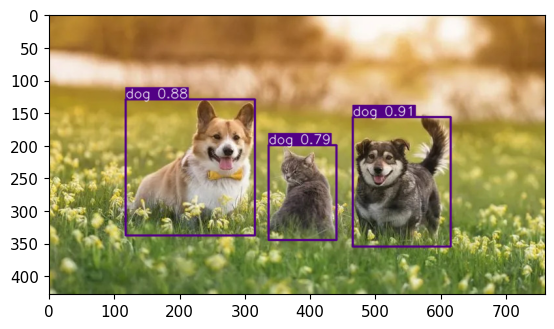

In [10]:
# display detection
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# 4. Live Detections using `yolov5s` model (with webcam)

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

# 5. Capture & label image samples for model training

## 5.1 Capture image samples
Prepare image samples, preferable square dimensions (e.g: 640x640 pixels)

## 5.2 Label you image samples
https://youtu.be/tFNJGim3FXw?t=2810

### Install LabelImg

In [ ]:
!pip install labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 16.32 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


### Start label images
https://youtu.be/tFNJGim3FXw?t=3142

In [ ]:
!labelImg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 7.9 MB/s eta 0:00:00


# 6. Train Model
https://youtu.be/tFNJGim3FXw?t=3536

## 6.1 Start training

In [ ]:
# setup dataset.yaml, https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data#11-create-datasetyaml
dataset_path = f'{root_path}/dataset.yaml'

# delete label cache
file_path = 'data/labels.cache'
if os.path.isfile(file_path):
    os.remove(file_path)

In [ ]:
!cd yolov5 && python train.py --img 2304 --batch 4 --epochs 300 --data $dataset_path --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/git/poop-detector-yolo-rtsp/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=250, batch_size=4, imgsz=2304, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4

## 6.2 Show Training Results

In [ ]:
def find_latest_exp(path):
  exp_folders = [folder for folder in os.listdir(path) if folder.startswith('exp')]

  if exp_folders:
      largest_exp = max(exp_folders, key=lambda x: 0 if x=='exp' else int(x[3:]))
      print("Largest exp number:", largest_exp)
  else:
      print("No 'exp' folders found.")
      largest_exp = 'exp'

  return largest_exp

In [ ]:
train_path = 'yolov5/runs/train'
latest_exp = find_latest_exp(train_path)

Largest exp number: exp2


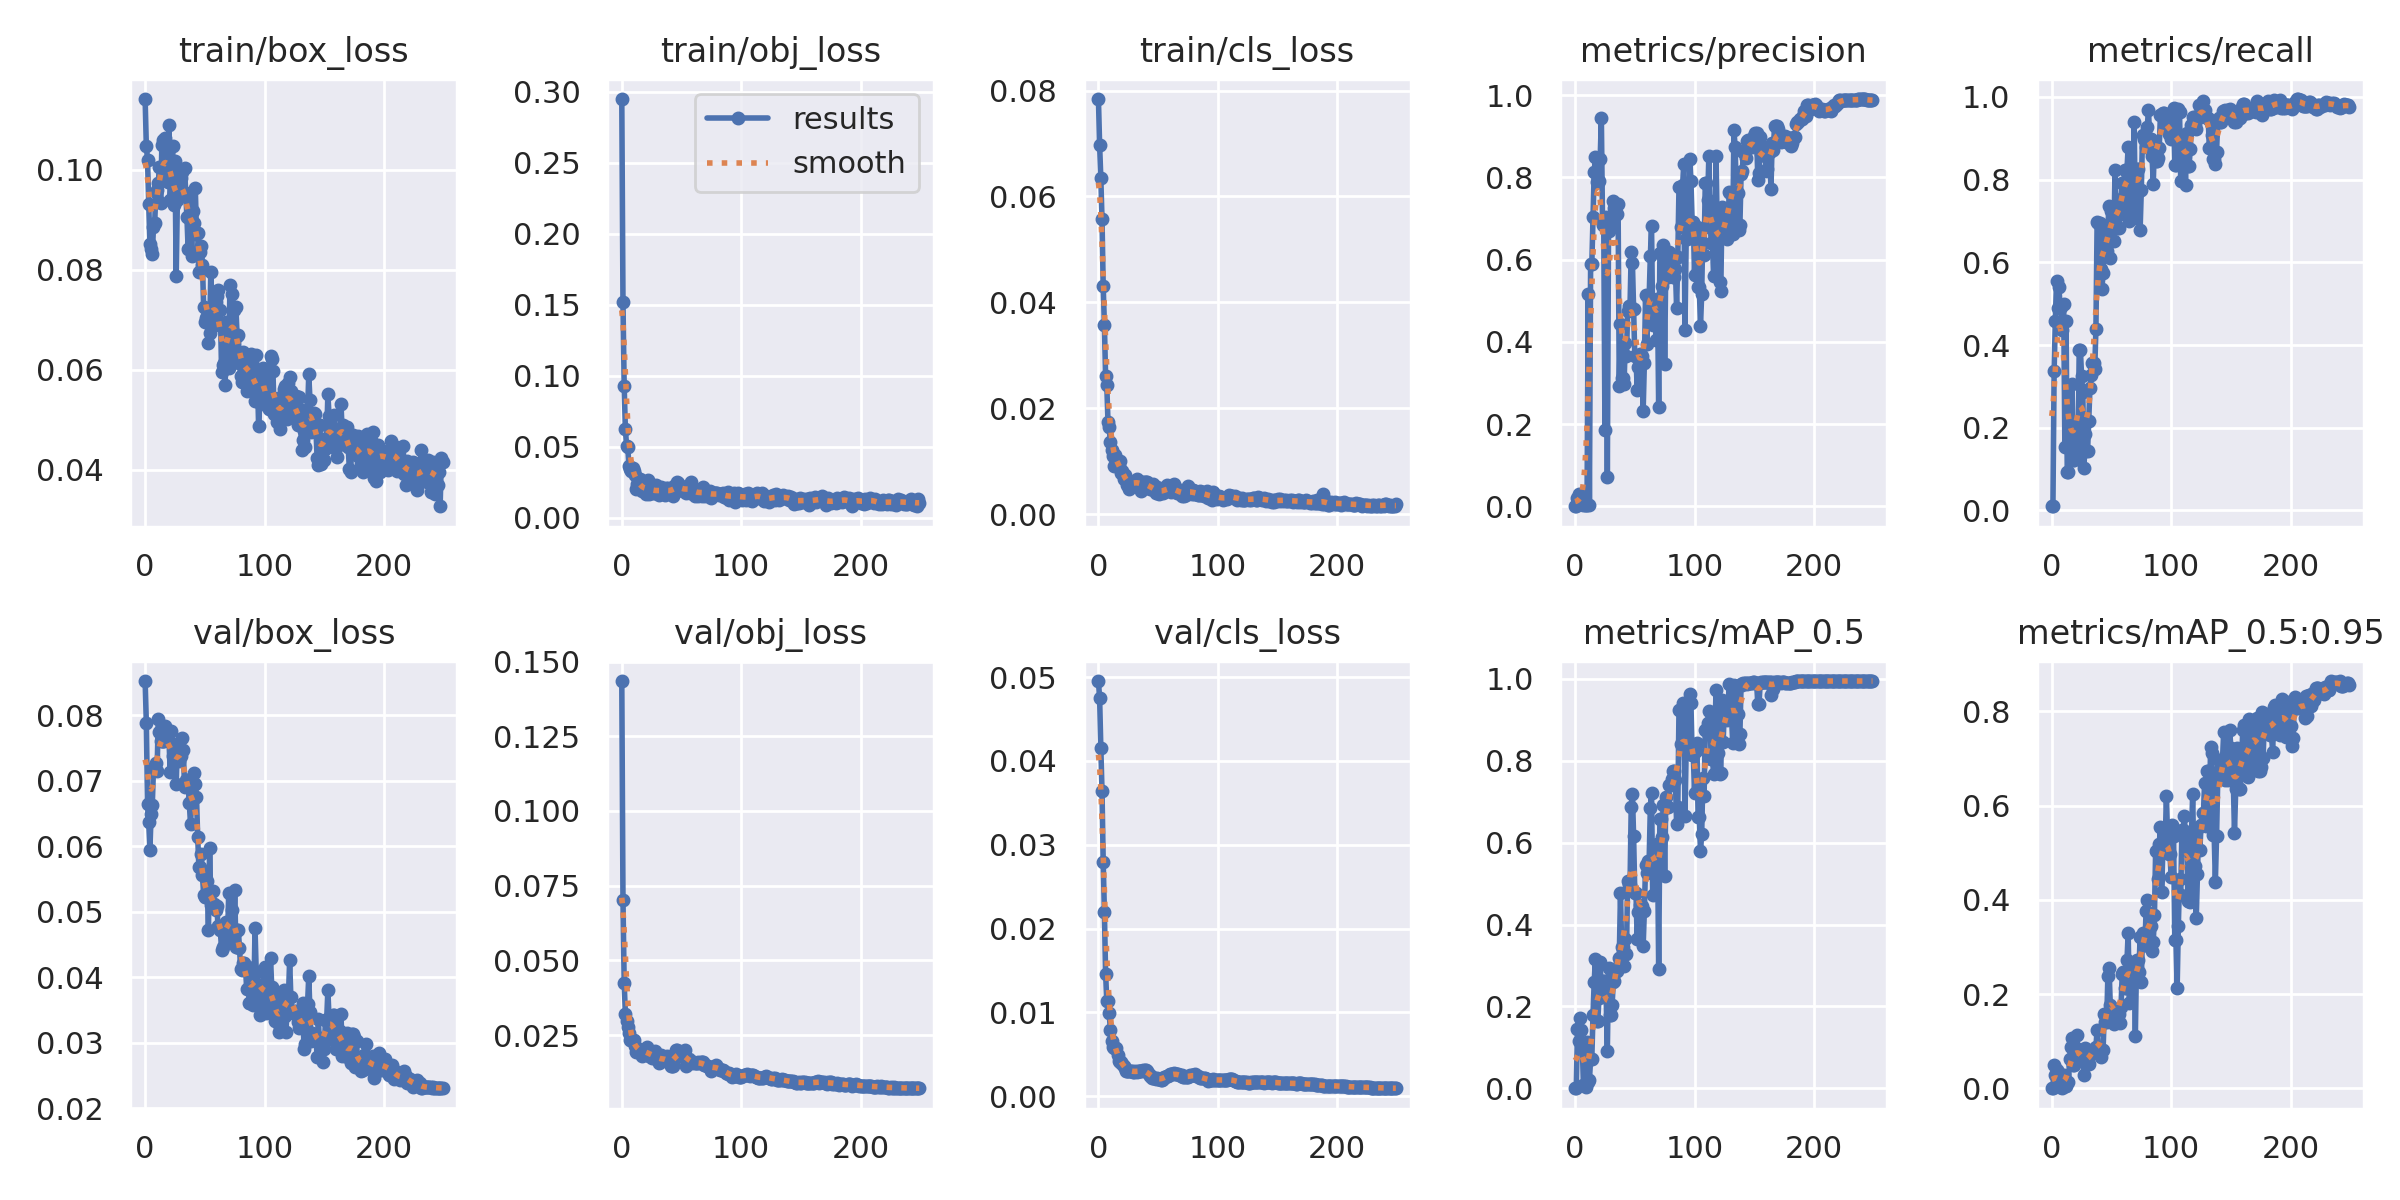

In [ ]:
from PIL import Image

# Load the image
image_path = f'{train_path}/{latest_exp}/results.png'
image = Image.open(image_path)

# Display the image
image.show()

# 7. Test Model

In [ ]:
model_path = f'{train_path}/{latest_exp}/weights/best.pt'
print(model_path)

yolov5/runs/train/exp2/weights/best.pt


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\dennis/.cache\torch\hub\master.zip
YOLOv5  2023-5-24 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


## 7.1 Test image

In [ ]:
img = 'data/images/dog-poop-023-05-23-18h29m46s747.png'

In [ ]:
# print detection result
results = model(img)
results.print()

image 1/1: 1296x2304 1 dog
Speed: 108.2ms pre-process, 283.0ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


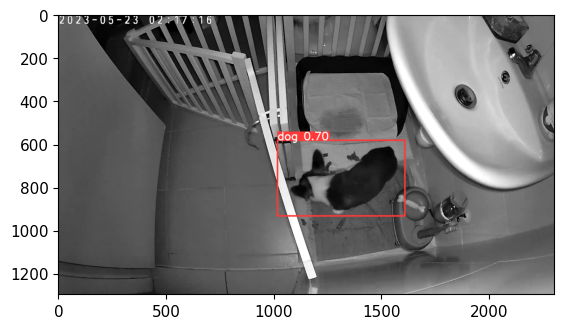

In [ ]:
# display detection result
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

## 7.2 Test video (mp4)

In [ ]:
video = 'data/tests/test.mp4'

In [ ]:
!python yolov5/detect.py --weights $model_path --viwe-img --source $video

detect: weights=['yolov5/runs/train/exp2/weights/best.pt'], source=data/tests/test.mp4, data=yolov5\data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'G:\My': No such file or directory
YOLOv5  2023-5-24 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
video 1/1 (1/656) G:\My Drive\git\poop-detector-yolo-rtsp\data\tests\test.mp4: 384x640 1 dog, 313.0ms
video 1/1 (2/656) G:\My Drive\git\poop-detector-yolo-rtsp\data\tests\test.mp4: 384x640 1 dog, 291.0ms
video 1/1 (3/656) G:\My Drive\git\poop-detector-yolo-rtsp\data\tests\test.mp4: 384x640 1 dog, 275

^C
